# Data-X Spring 2018: Homework 05

### Linear regression, logistic regression, matplotlib.


In this homework, you will do some exercises with prediction and plotting. 

REMEMBER TO DISLPAY ALL OUTPUTS. If the question asks you to do something, make sure to print your results so we can easily see that you have done it.


## Part 1 - Regression


### Data:
__Data Source__:
Data file is uploaded to bCourses and is named: __Energy.csv__

The dataset was created by Angeliki Xifara ( Civil/Structural Engineer) and was processed by Athanasios Tsanas, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).

__Data Description__:

The dataset contains eight attributes of a building (or features, denoted by X1...X8) and response being the heating load on the building, y1. 

* X1	Relative Compactness 
* X2	Surface Area 
* X3	Wall Area 
*  X4	Roof Area 
*  X5	Overall Height 
* X6	Orientation 
*  X7	Glazing Area 
*  X8	Glazing Area Distribution 
*  y1	Heating Load 


#### Q1.1
Read the data file in python. Check if there are any NaN values, and print the results.

Describe data features in terms of type, distribution range (max and min), and mean values. 

Plot feature distributions. This step should give you clues about data sufficiency.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Energy.csv")
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


In [2]:
print("X6 and X8 are integers but these integers each represent one class")
data.dtypes

X6 and X8 are integers but these integers each represent one class


X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
dtype: object

In [3]:
print("nan in the dataframe: ", data.isnull().values.any())

nan in the dataframe:  False


In [4]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


 __REGRESSION__:
LABELS ARE CONTINUOUS VALUES.
Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.  

__Q 1.2: Train a linear regression model on 80 percent of the given dataset, what is the intercept value and coefficient values.__



In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


train, test = train_test_split(data, test_size=0.2,random_state = 100)
train_features, train_labels = train.drop(columns="Y1").values, train["Y1"].values
test_features, test_labels = test.drop(columns="Y1").values, test["Y1"].values

model = LinearRegression()
model.fit(train_features, train_labels)
print("slope coeficients: ", *model.coef_)
print("y intercept: ", model.intercept_)

slope coeficients:  -63.3926289906996 -0.05863804283030222 0.03460243054626765 -0.04662023670801498 4.361946516216307 0.0181224259480691 19.87602013585587 0.21916720774262954
y intercept:  79.13116174147392



#### Q.1.3: Report model performance using 'ROOT MEAN SQUARE' error metric on:  
__1. Data that was used for training(Training error)__   
__2. On the 20 percent of unseen data (test error) __ 



In [6]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_labels_predict = model.predict(train_features)
train_rmse = sqrt(mean_squared_error(train_labels, train_labels_predict))

test_labels_predict = model.predict(test_features)
test_rmse = sqrt(mean_squared_error(test_labels, test_labels_predict))

print("ROOT MEAN SQUARE ERROR for train set: ", model.score(train_features, train_labels))
print("ROOT MEAN SQUARE ERROR for test set: ", model.score(test_features, test_labels))

ROOT MEAN SQUARE ERROR for train set:  0.917609735213147
ROOT MEAN SQUARE ERROR for test set:  0.9094940669491965


In [7]:
from grader import grade_1

In [8]:
grade_1(test_labels_predict)

100

In [9]:
test_labels

array([10.68, 23.89, 24.24, 41.96, 12.73, 14.37, 23.87, 40.  , 36.45,
       13.78, 28.65, 10.7 , 14.56, 15.29, 10.85, 36.86, 22.93, 28.75,
       32.38, 14.58, 10.43, 24.31, 31.63, 42.5 , 39.97, 10.36, 31.53,
       15.3 , 10.72, 18.48, 28.7 , 23.59, 36.66, 12.43, 10.07, 11.22,
       18.84, 14.66, 17.5 , 35.4 , 24.58, 16.55, 29.22, 31.64, 14.52,
       15.16, 19.42, 19.34, 15.16, 13.18, 32.85, 13.  , 12.63, 39.68,
       10.54, 25.41, 28.05, 12.28, 25.17, 24.13, 12.45, 16.94, 29.91,
       14.66, 28.66, 32.49, 12.84, 27.9 , 26.44, 24.37, 29.49,  6.07,
       39.04, 16.99, 12.25, 32.09, 10.53, 24.32, 16.47, 32.71, 16.44,
       36.7 , 24.23, 42.11, 13.04, 35.78, 14.55, 29.83, 26.47, 10.7 ,
       17.14, 14.54, 12.82, 28.58, 14.53, 12.93, 28.37, 29.87, 11.42,
       29.52, 16.86, 36.43, 17.26, 28.86, 33.27, 29.07, 36.97, 13.91,
       28.31, 14.66, 38.84, 14.61, 10.38, 12.28, 35.48, 26.33, 12.18,
       31.84, 12.3 , 32.21, 11.34, 17.05, 32.4 , 15.16, 12.19, 29.01,
       33.12, 39.04,

In [10]:
test_rmse

2.905413624299769


#### Q1.4: 

Lets us see the effect of amount of data on the performance of prediction model. Use varying amounts of  Training data (100,200,300,400,500,all) to train regression models and report  training error and validation error in each case. Validation data/Test data  is the same as above for  all  these cases.

**Plot error rates vs number of training examples.** Both the training error and the validation error should be plotted. Comment on the relationship you observe in the plot, between the amount of data used to train the model and the validation accuracy of the model.

__Hint:__ Use array indexing to choose varying data amounts

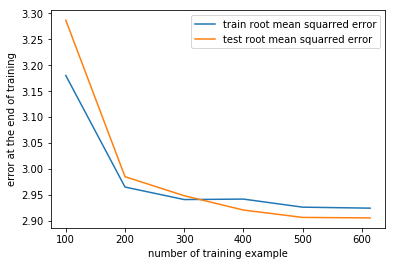

In [11]:
indices = np.arange(0, len(train_features))
np.random.shuffle(indices)

train_errors = []
test_errors = []
list_n_data = [100, 200, 300, 400, 500, len(train_features)]
for n_data in list_n_data:
    x = train_features[indices[0:n_data]]
    y = train_labels[indices[0:n_data]]
    x_all = train_features
    y_all = train_labels
    x_test = test_features
    y_test = test_labels
    
    model = LinearRegression()
    model.fit(x, y)
    
    # The error is always computed against the whole data set
    y_train_predict = model.predict(x_all)
    y_test_predict = model.predict(x_test)
    train_errors.append(sqrt(mean_squared_error(y_all, y_train_predict)))
    test_errors.append(sqrt(mean_squared_error(y_test, y_test_predict)))
    
plt.plot(list_n_data, train_errors, label="train root mean squarred error")
plt.plot(list_n_data, test_errors, label="test root mean squarred error")
plt.xlabel("number of training example")
plt.ylabel("error at the end of training")
plt.legend()

We can see that the number of training example reduces the total mean squarred error for both the training set and the testing set. We can also see that the root mean squarred error is lower for the training data set, which is normal since it is the data set we are trying to fit.

## Part 2 - Classification


__CLASSIFICATION__:
LABELS ARE DISCRETE VALUES.
Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance. You can also output the probabilities of an instance belnging to a class.  

__ Q 2.1:  Bucket values of 'y1' i.e 'Heating Load'  from the original dataset into 3 classes:__ 

0: 'Low' ( < 14),   
1: 'Medium'  (14-28),   
2: 'High'  (>28)

This converts the given dataset  into a classification problem, classes being, Heating load is: *low, medium or high*. Use this datset with transformed 'heating load' for creating a  logistic regression classifiction model that predicts heating load type of a building. Use test-train split ratio of 0.8 : 0.2.  

*Report training and test accuracies and  confusion matrices.*


**HINT:** Use pandas.cut

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Transform continuous data into categorical data
train_cut = pd.cut(train_labels, bins=[min(data['Y1'])-1, 14, 28, max(data['Y1'])], labels=["low", "medium", "high"])
test_cut = pd.cut(test_labels, bins=[min(data['Y1'])-1, 14, 28, max(data['Y1'])], labels=["low", "medium", "high"])
new_train_labels = train_cut.codes
new_test_labels = test_cut.codes

# Train a logistic regression model to fit the data
model = LogisticRegression()
model.fit(train_features, new_train_labels)


/Users/niladri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/niladri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [13]:
new_test_labels

array([0, 1, 1, 2, 0, 1, 1, 2, 2, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1,
       2, 2, 2, 0, 2, 1, 0, 1, 2, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2, 1, 2, 2,
       0, 1, 1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1,
       2, 1, 0, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0,
       0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2],
      dtype=int8)

In [14]:
new_y_train_predict = model.predict(train_features)
new_y_test_predict = model.predict(test_features)

In [15]:
new_y_train_predict

array([1, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 0, 2,
       2, 2, 1, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 2,
       0, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 1,
       2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 1,
       1, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2,
       0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2,
       0, 0, 0, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 2,
       2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 0, 1,

In [16]:


train_accuracy = model.score(train_features, new_train_labels)
test_accuracy = model.score(test_features, new_test_labels)
train_confusion_matrix = confusion_matrix(new_train_labels, new_y_train_predict, labels=["low", "medium", "high"])
test_confusion_matrix = confusion_matrix(new_test_labels, new_y_test_predict, labels=["low", "medium", "high"])

# PLOT
print("train accuracy: {}%".format(round(100*train_accuracy, 1)))
print("test accuracy: {}%".format(round(100*test_accuracy, 1)))

train_confusion_matrix.plot()
plt.title("Confusion Matrix for train set")

test_confusion_matrix.plot()
plt.title("Confusion Matrix for test set")

plt.show()

/Users/niladri/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:261: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

In [17]:
test_cut

[low, medium, medium, high, low, ..., medium, low, high, medium, high]
Length: 154
Categories (3, object): [low < medium < high]

__ Q2.2: 
One of the preprocessing steps in Data science is Feature Scaling i.e getting all our data on the same scale by setting same  Min-Max of feature values. 
This makes training less sensitive to the scale of features . 
Scaling is important in algorithms that use distance based classification, SVM or K means or those that involve gradient descent optimization. If we  Scale features in the range [0,1] it is called unity based normalization.__

__Perform unity based normalization on the above dataset and train the model again, compare model performance in training and validation with your previous model.__  

refer:http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler  
more at: https://en.wikipedia.org/wiki/Feature_scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
minmaxscaler.fit(train_features)  # we do not want to consider testing set in the scaling to avoid adding a bias

scaled_features_train = minmaxscaler.transform(train_features)
scaled_features_test = minmaxscaler.transform(test_features)

model = LogisticRegression()
model.fit(scaled_features_train, new_train_labels)

scaled_train_y_predict = model.predict(scaled_features_train)
scaled_test_y_predict = model.predict(scaled_features_test)

scaled_train_accuracy = model.score(scaled_features_train, new_train_labels)
scaled_test_accuracy = model.score(scaled_features_test, new_test_labels)

print("train accuracy: {}%".format(round(100*scaled_train_accuracy, 1)))
print("test accuracy: {}%".format(round(100*scaled_test_accuracy, 1)))

train accuracy: 82.2%
test accuracy: 81.2%


/Users/niladri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/niladri/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [20]:
from grader import grade_2

In [22]:
grade_2(new_y_test_predict)

100

We see a small increase in accuracy with the scaled dataset. However there is a good part of randomness, changing the training set and the test set can lead to examples where the accuracy in the scaled case is lower than in the non-scaled case. Therefore even though it is indeed useful to scale the features, it is hard to see it with a dataset of this size.

## Part 3 - Matplotlib

**Q 3.1a. Create a dataframe called `icecream` that has column `Flavor` with entries `Strawberry`, `Vanilla`, and `Chocolate` and another column with `Price` with entries `3.50`, `3.00`, and `4.25`. **

In [9]:
df = pd.DataFrame()
df.name = "icecream"
df["Flavor"] = ["Strawberry", "Vanilla", "Chocolate"]
df["Price"] = [3.5, 3, 4.25]
df

,Flavor,Price
0,Strawberry,3.50
1,Vanilla,3.00
2,Chocolate,4.25


**Q 3.1b 
Create a bar chart representing the three flavors and their associated prices.**

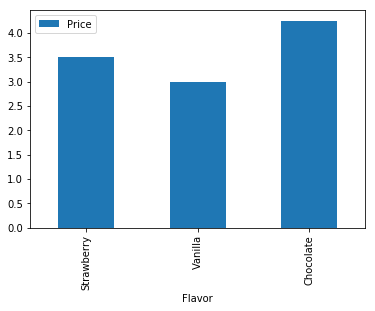

In [10]:
df.plot(x="Flavor", y="Price", kind="bar")
None

**Q 3.2   Create 9 random plots (Hint: There is a numpy function for generating random data). The top three should be scatter plots (one with green dots, one with purple crosses, and one with blue triangles. The middle three graphs should be a line graph, a horizontal bar chart, and a histogram. The bottom three graphs should be trignometric functions (one sin, one cosine, one tangent).**

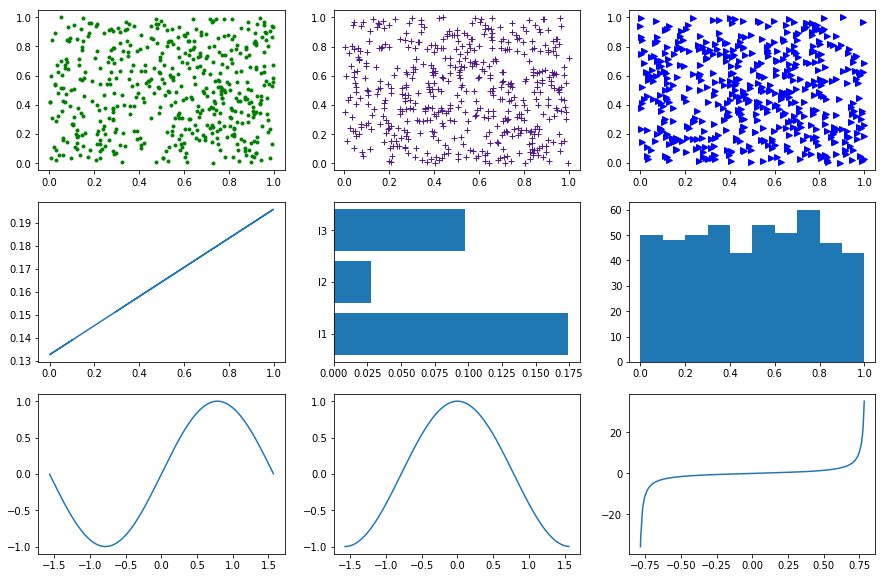

In [11]:
data = np.random.random(size=(9, 2, 500))

plt.figure(figsize=(15, 10))

plt.subplot(331)
plt.plot(data[0, 0], data[0, 1], "g.")

plt.subplot(332)
plt.plot(data[1, 0], data[1, 1], c="#551a8b", marker="+", linestyle="")

plt.subplot(333)
plt.plot(data[2, 0], data[2, 1], "b>")

plt.subplot(334)
plt.plot(data[3, 0], data[3, 0] * data[3, 1, 0] + data[3, 1, 1])

plt.subplot(335)
plt.barh(["l1", "l2", "l3"], data[4, 0, 0:3])

plt.subplot(336)
plt.hist(data[5, 0])

plt.subplot(337)
plt.plot((np.sort(data[6, 0]) - 0.5)*np.pi, np.sin(np.sort(data[6, 0]*2*np.pi - np.pi)))

plt.subplot(338)
plt.plot((np.sort(data[7, 0]) - 0.5)*np.pi, np.cos(np.sort(data[7, 0]*2*np.pi - np.pi)))

plt.subplot(339)
plt.plot((np.sort(data[8, 0]) - 0.5)*np.pi/2, np.tan((np.sort(data[8, 0]) - 0.5)*(np.pi-0.05)))